<a href="https://colab.research.google.com/github/Harshavardhanrajuthonti/AIML-BATCH_5/blob/main/Assignment2aiml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASSIGNMENT - 2



---

Task1 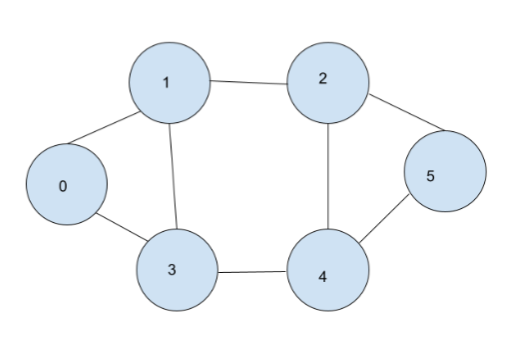– Implement Breadth First Search Algorithm using a Queue.


1. Given a graph with adjacency list and a starting vertex and we have to traverse the
graph.
2. We will first print the value in the starting vertex,
3. Continue to print the value of neighbors of the starting vertex and
4. Next move on to the next level after completing the current level till all the vertices of
the graph are printed.

In [3]:
from queue import Queue

graph = {0: [1, 3], 1: [0, 2, 3], 2: [4, 1, 5], 3: [4, 0, 1], 4: [2, 3, 5], 5: [4, 2], 6: []}
print("The adjacency List representing the graph is:")
print(graph)


def bfs(graph, source):
    Q = Queue()
    visited_vertices = set()
    Q.put(source)
    visited_vertices.update({0})
    while not Q.empty():
        vertex = Q.get()
        print(vertex, end="-->")
        for u in graph[vertex]:
            if u not in visited_vertices:
                Q.put(u)
                visited_vertices.update({u})

print("BFS traversal of graph with source 0 is:")
bfs(graph, 0)

The adjacency List representing the graph is:
{0: [1, 3], 1: [0, 2, 3], 2: [4, 1, 5], 3: [4, 0, 1], 4: [2, 3, 5], 5: [4, 2], 6: []}
BFS traversal of graph with source 0 is:
0-->1-->3-->2-->4-->5-->

Part 2 – Implement Depth First Search Algorithm using a Stack

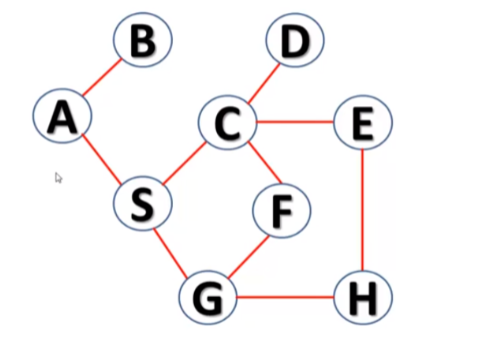

Part 2 – Implement Depth First Search Algorithm using a Stack
0.1 DFS Stack implementations steps to be followed:
1. Start at the root node and push it onto the stack.
2. Check for any adjacent nodes of the tree and select one node.
3. Traverse the entire branch of the selected node and push all the nodes into the stack.
4. Upon reaching the end of a branch (no more adjacent nodes) ie nth leaf node, move
back by a single step and look for adjacent nodes of the n-1th node.
5. If there are adjacent nodes for the n-1th node, traverse those branches and push nodes
onto the stack.

In [2]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    print(start, end=' ')
    for neighbor in graph[start]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)

# Example adjacency list representation of a graph
graph = {
    'a': ['b', 's'],
    'b': ['a'],
    's': ['a', 'c', 'g'],
    'c': ['d', 'e' ,'f' ,'s'],
    'd': ['c'],
    'e': ['c', 'h'],
    'h': ['g', 'e'],
    'f': ['c', 'g'],
    'g': ['f' ,'h']
}

start_vertex = 'a'
print("Depth-First Traversal:")
dfs(graph, start_vertex)

Depth-First Traversal:
a b s c d e h g f 

PART - 3 Implement A* Algorithm using Numpy
1. A*Algorithm (pronounced as A-star) is a combination of ‘branch and bound search
algorithm’ and ‘best search algorithm’ combined with the dynamic programming prin-
ciple.
2. The A* Algorithm is well-known because it is used for locating path and graph traver-
sals.
3. This algorithm is used in numerous online maps and games.
4. It uses a heuristic or evaluation function usually denoted by f(X) to determine the order
in which the search visits nodes in the tree

In [4]:
import numpy as np

def misplaced_tiles(puzzle, goal):
    # Calculate the number of misplaced tiles, ignoring the blank space
    return np.sum(np.where(puzzle != goal, 1, 0)) - 1

def get_neighbors(puzzle):
    # Function to get the neighbors (successors) of the current state
    neighbors = []
    blank_pos = np.where(puzzle == 0)[0][0]
    row, col = divmod(blank_pos, 3)

    moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right
    for dr, dc in moves:
        new_row, new_col = row + dr, col + dc
        if 0 <= new_row < 3 and 0 <= new_col < 3:
            new_blank_pos = new_row * 3 + new_col
            new_puzzle = puzzle.copy()
            new_puzzle[blank_pos], new_puzzle[new_blank_pos] = new_puzzle[new_blank_pos], new_puzzle[blank_pos]
            neighbors.append(new_puzzle)
    return neighbors

def a_star_8_puzzle(initial_state, goal_state):
    # Initial state setup with g(n)=0 and h(n) using the misplaced_tiles heuristic
    state = [{'puzzle': initial_state, 'parent': None, 'gn': 0, 'hn': misplaced_tiles(initial_state, goal_state)}]
    explored = []

    while state:
        # Sort the states by f(n) = g(n) + h(n) and pop the first
        state.sort(key=lambda x: x['gn'] + x['hn'])
        current = state.pop(0)
        explored.append(current['puzzle'].tobytes())

        if np.array_equal(current['puzzle'], goal_state):
            # Goal state reached, reconstruct and return the path
            return reconstruct_path(current, explored)

        for neighbor in get_neighbors(current['puzzle']):
            if neighbor.tobytes() not in explored:
                gn = current['gn'] + 1  # Cost from start to node
                hn = misplaced_tiles(neighbor, goal_state)  # Heuristic cost
                state.append({'puzzle': neighbor, 'parent': current, 'gn': gn, 'hn': hn})

def reconstruct_path(node, explored):
    path = []
    while node['parent'] is not None:
        path.append(node['puzzle'])
        node = node['parent']
    path.append(node['puzzle'])  # Add the initial state
    return path[::-1]  # Return reversed path

# Example usage
initial_state = np.array([2, 8, 3, 1, 6, 4, 7, 0, 5])
goal_state = np.array([1, 2, 3, 8, 0, 4, 7, 6, 5])

solution_path = a_star_8_puzzle(initial_state, goal_state)
print("Solution Path:")
for step, state in enumerate(solution_path):
    print(f"Step {step}:\n{state.reshape(3, 3)}\n")

print(f"Total moves: {len(solution_path) - 1}")

Solution Path:
Step 0:
[[2 8 3]
 [1 6 4]
 [7 0 5]]

Step 1:
[[2 8 3]
 [1 0 4]
 [7 6 5]]

Step 2:
[[2 0 3]
 [1 8 4]
 [7 6 5]]

Step 3:
[[0 2 3]
 [1 8 4]
 [7 6 5]]

Step 4:
[[1 2 3]
 [0 8 4]
 [7 6 5]]

Step 5:
[[1 2 3]
 [8 0 4]
 [7 6 5]]

Total moves: 5
